# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices - Comparing Indian Banks and American Banks during and post the 2009 financial crisis. 
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

In [275]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
from nsepy import get_history
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

In [159]:
#Current Rupee to Dollar conversion rate
RPD=0.0132335

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:

* SBI
* Yes Bank
* ICICI Bank
* HDFC Bank
* Kotak Mahindra Bank
* Axis Bank
<br>

* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo
<br>

We will be convering all indian stock prices to dollars
<br>We will be importing Indian stocks using the NSEpy library and American stocks using yahoo

In [166]:
SBIN=get_history(symbol="SBIN", start=date(2006,1,1), end=date(2015,12,31)).iloc[:,[3,4,5,7,9]]
SBIN.iloc[:,:-1]=SBIN.iloc[:,:-1]*RPD

In [167]:
YESBANK=get_history(symbol="YESBANK", start=date(2006,1,1), end=date(2015,12,31)).iloc[:,[3,4,5,7,9]]
YESBANK.iloc[:,:-1]=YESBANK.iloc[:,:-1]*RPD

In [168]:
ICICIBANK=get_history(symbol="ICICIBANK", start=date(2006,1,1), end=date(2015,12,31)).iloc[:,[3,4,5,7,9]]
ICICIBANK.iloc[:,:-1]=ICICIBANK.iloc[:,:-1]*RPD

In [169]:
HDFCBANK=get_history(symbol="HDFCBANK", start=date(2006,1,1), end=date(2015,12,31)).iloc[:,[3,4,5,7,9]]
HDFCBANK.iloc[:,:-1]=HDFCBANK.iloc[:,:-1]*RPD

In [170]:
KOTAKBANK=get_history(symbol="KOTAKBANK", start=date(2006,1,1), end=date(2015,12,31)).iloc[:,[3,4,5,7,9]]
KOTAKBANK.iloc[:,:-1]=KOTAKBANK.iloc[:,:-1]*RPD

In [171]:
AXISBANK=get_history(symbol="AXISBANK", start=date(2006,1,1), end=date(2015,12,31)).iloc[:,[3,4,5,7,9]]
AXISBANK.iloc[:,:-1]=AXISBANK.iloc[:,:-1]*RPD

In [204]:
columns=['Open','High','Low','Close','Volume']
BAC=data.DataReader('BAC', 'yahoo', start=date(2006,1,1), end=date(2016,12,31)).iloc[:,:-1]
BAC['Volume']=BAC['Volume'].astype('int')
BAC=BAC[columns]

In [205]:
C=data.DataReader('C', 'yahoo', start=date(2006,1,1), end=date(2016,12,31)).iloc[:,:-1]
C['Volume']=C['Volume'].astype('int')
C=C[columns]

In [206]:
GS=data.DataReader('GS', 'yahoo', start=date(2006,1,1), end=date(2016,12,31)).iloc[:,:-1]
GS['Volume']=GS['Volume'].astype('int')
GS=GS[columns]

In [207]:
JPM=data.DataReader('JPM', 'yahoo', start=date(2006,1,1), end=date(2016,12,31)).iloc[:,:-1]
JPM['Volume']=JPM['Volume'].astype('int')
JPM=JPM[columns]

In [208]:
MS=data.DataReader('MS', 'yahoo', start=date(2006,1,1), end=date(2016,12,31)).iloc[:,:-1]
MS['Volume']=MS['Volume'].astype('int')
MS=MS[columns]

In [209]:
WFC=data.DataReader('WFC', 'yahoo', start=date(2006,1,1), end=date(2016,12,31)).iloc[:,:-1]
WFC['Volume']=WFC['Volume'].astype('int')
WFC=WFC[columns]

In [173]:
tickers1=['SBIN','YESBANK','ICICIBANK','HDFCBANK','KOTAKBANK','AXISBANK']
tickers2=['BAC','C','GS','JPM','MS','WFC']

In [218]:
bank_stocks1=pd.concat([SBIN,YESBANK,ICICIBANK,HDFCBANK,KOTAKBANK,AXISBANK],axis=1,keys=tickers1)
bank_stocks2=pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers2)

In [219]:
bank_stocks1.columns.names = ['Bank Ticker','Stock Info']
bank_stocks2.columns.names = ['Bank Ticker','Stock Info']

In [220]:
bank_stocks1.head(2)

Bank Ticker       SBIN                                             YESBANK  \
Stock Info        Open       High        Low      Close   Volume      Open   
Date                                                                         
2006-01-02   12.075569  12.145045  11.938602  11.974994  2004095  0.913112   
2006-01-03   12.017341  12.108652  11.989551  12.069614  1647614  0.907818   

Bank Ticker                                        ... KOTAKBANK            \
Stock Info       High       Low     Close  Volume  ...      Open      High   
Date                                               ...                       
2006-01-02   0.919728  0.902525  0.904510   80274  ...  3.011283  3.030471   
2006-01-03   0.942225  0.906495  0.919728  342338  ...  3.009960  3.123106   

Bank Ticker                              AXISBANK                      \
Stock Info        Low     Close  Volume      Open      High       Low   
Date                                                                    
2006-01-02   2.952394  2.978861  169491  3.864182  3.884032  3.791398   
2006-01-03   2.989448  3.107226  450591  3.840362  3.888002  3.817865   

Bank Ticker                    
Stock Info      Close  Volume  
Date                           
2006-01-02   3.815218  143118  
2006-01-03   3.832422   83993  

[2 rows x 30 columns]

In [221]:
bank_stocks2.head(2)

Bank Ticker        BAC                                                      C  \
Stock Info        Open       High        Low      Close    Volume        Open   
Date                                                                            
2006-01-03   46.919998  47.180000  46.150002  47.080002  16296700  490.000000   
2006-01-04   47.000000  47.240002  46.450001  46.580002  17757900  488.600006   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low       Close   Volume  ...       Open   
Date                                                      ...              
2006-01-03   493.799988  481.100006  492.899994  1537600  ...  57.169998   
2006-01-04   491.000000  483.500000  483.799988  1870900  ...  58.700001   

Bank Ticker                                                  WFC          \
Stock Info        High        Low      Close   Volume       Open    High   
Date                                                                       
2006-01-03   58.490002  56.740002  58.310001  5377000  31.600000  31.975   
2006-01-04   59.279999  58.349998  58.349998  7977800  31.799999  31.820   

Bank Ticker                               
Stock Info      Low      Close    Volume  
Date                                      
2006-01-03   31.195  31.900000  11016400  
2006-01-04   31.365  31.530001  10870000  

[2 rows x 30 columns]

# EDA

1. Max Close price for each bank's stock throughout the time period

In [222]:
bank_stocks1.xs('Close',axis=1,level=1).max()

Bank Ticker
SBIN         46.184253
YESBANK      11.695767
ICICIBANK    23.742222
HDFCBANK     33.954514
KOTAKBANK    19.130348
AXISBANK     26.776002
dtype: float64

In [223]:
bank_stocks2.xs('Close',axis=1,level=1).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     87.129997
MS      89.300003
WFC     58.520000
dtype: float64

2. Creating a dataframe for comparing returns throughout the time period. Returns is given by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [224]:
returns1=pd.DataFrame()
returns2=pd.DataFrame()

In [225]:
for bank in tickers1:
    returns1[bank+' return']=bank_stocks1.xs('Close',axis=1,level=1).loc[:,bank].pct_change()
for bank in tickers2:
    returns2[bank+' return']=bank_stocks2.xs('Close',axis=1,level=1).loc[:,bank].pct_change()

## Pairplots

### Indian Banks

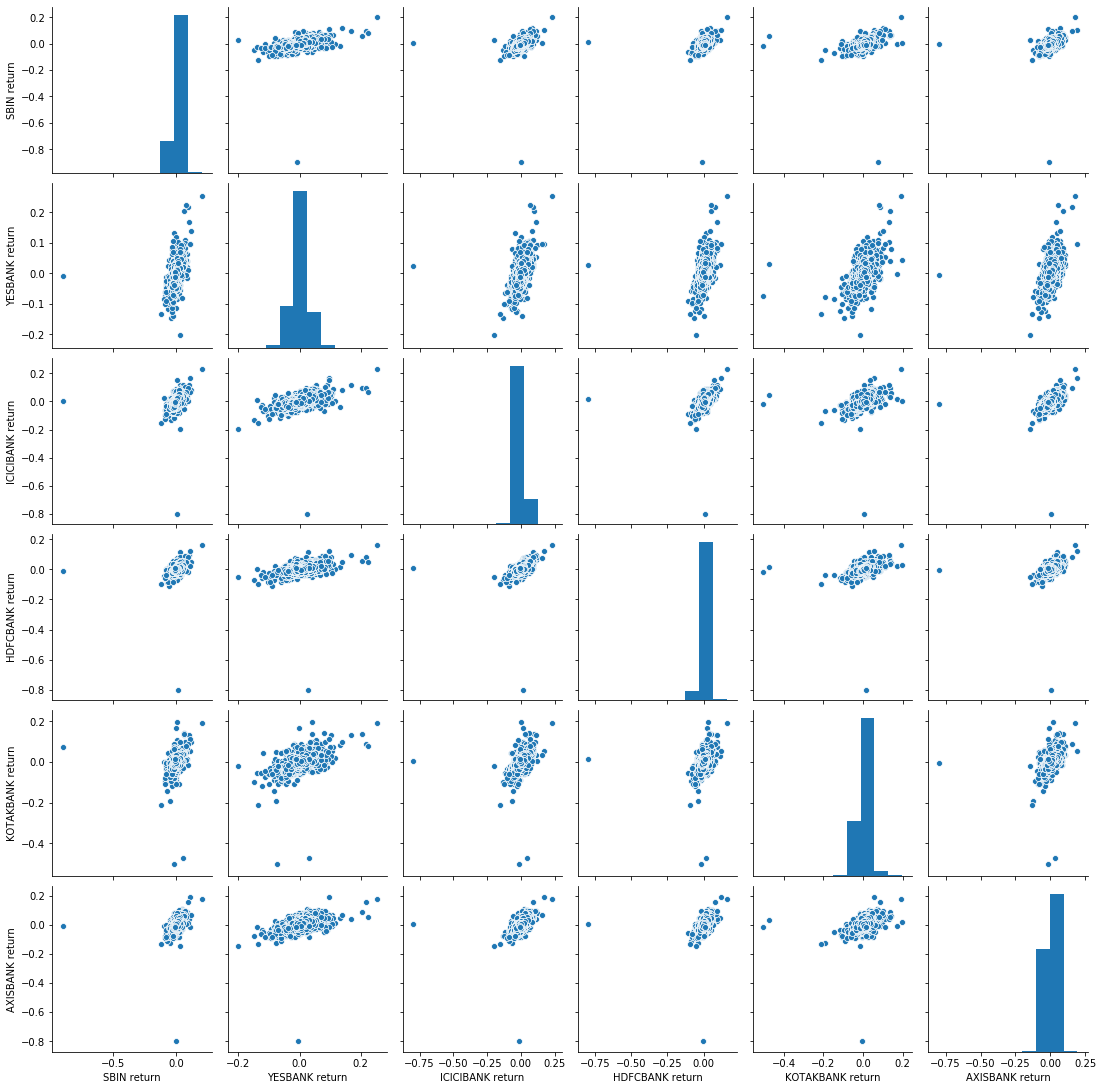

In [226]:
sns.pairplot(returns1)

Questions to ask about the above pairplot of Indian Banks:
1. SBI, HDFC and AXIS bank all had a drop of 0.8%. Is it on the same day? Does it coincide with the day the other three banks had around a 0.2 - 0.4% drop?
2. HDFC apears to have a very less standard deviation with most of its returns falling under a single bin. Why? Is it because of scaling? Let's check its std compared to others later. On the other hand, yes bank appears to have the most fluctuation, including higher growth. Is it because of its general differentiation from other banks?
3. Kotak has had two major one day drops compared to just one in other banks. What happened on both these days?

### American Banks

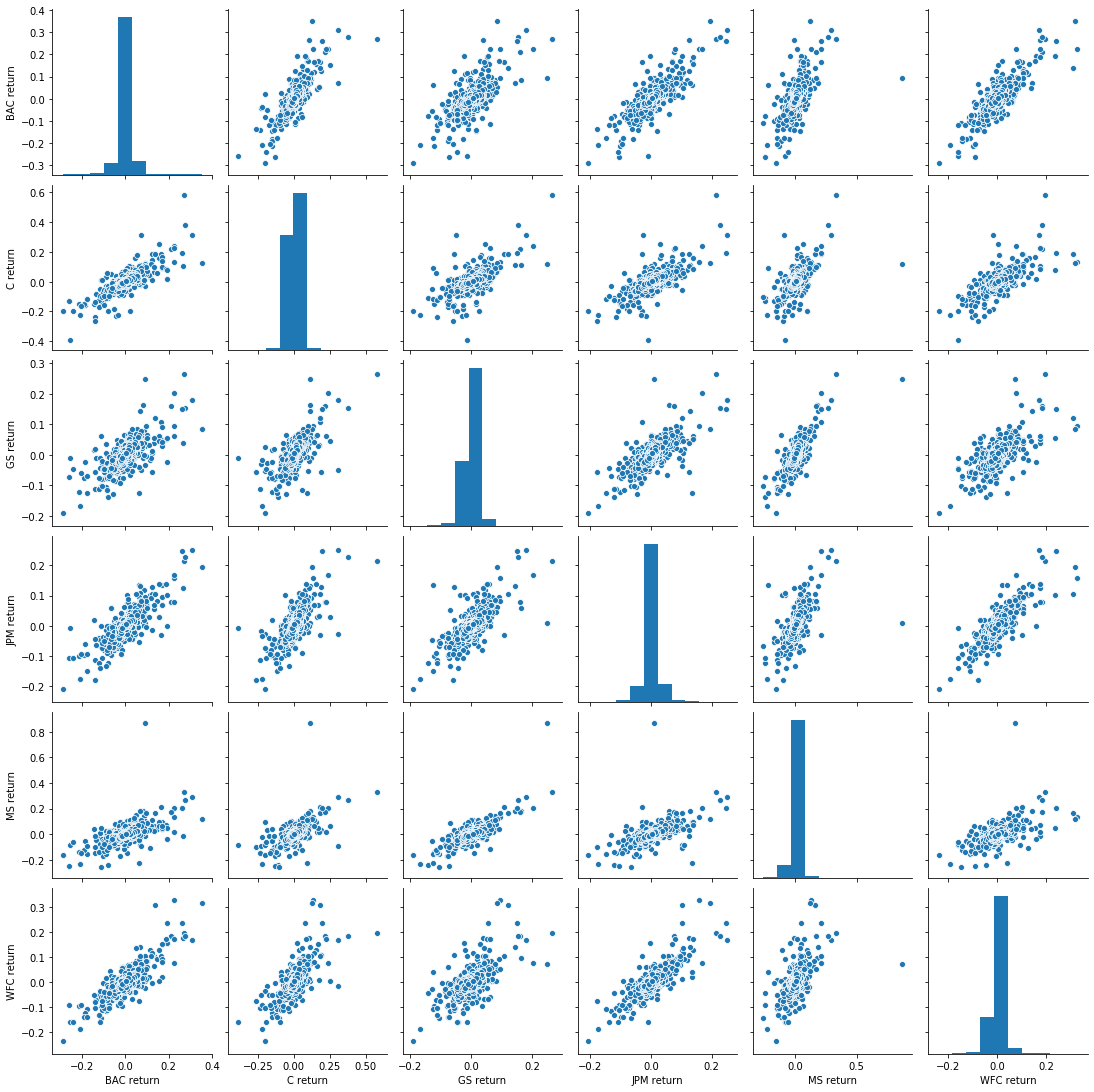

In [227]:
sns.pairplot(returns2)

Questions to ask about the above pairplot of American Banks:
1. Citi appears to have the biggest one day drop of 0.4%. Is it on the same day as the biggest drops of other banks and if so, why was citi the biggest drop? 
2. Citi also appears to have the most amount of fluctuation. Why?
3. Morgan Stanley has the highest single day return of 0.8%.

## Best and Worst single day returns

### Indian Banks

In [231]:
returns1.idxmin()

SBIN return         2014-11-20
YESBANK return      2008-10-10
ICICIBANK return    2014-12-04
HDFCBANK return     2011-07-14
KOTAKBANK return    2015-07-08
AXISBANK return     2014-07-28
dtype: object

In [232]:
returns1.idxmax()

SBIN return         2009-05-18
YESBANK return      2009-05-18
ICICIBANK return    2009-05-18
HDFCBANK return     2009-05-18
KOTAKBANK return    2006-06-09
AXISBANK return     2008-10-13
dtype: object

Questions:
1. Three banks have their lowest one day returns around the second half of 2014. What was happening around this time? - No particular reasons. The fact the the lowest returns are relatively scattered shows that banks did not have any one major drops during those 10 years
2. What happpened on 10th October 2008 for Yes Bank (biggest drop)? - No particular reason, a large volume of trades took place, looks like a herd mentality, also Yes Bank had very low share prices during it's early start phase.
3. Four banks had their maximum one day return on the 18th of May, 2009. Why? - UPA won the elections.

In [235]:
returns2.idxmin()

BAC return   2009-01-20
C return     2009-02-27
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

In [236]:
returns2.idxmax()

BAC return   2009-04-09
C return     2008-11-24
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

Questions:

1. Worst drop for three banks happened on 20th January, 2009. Why?  - Looks like the First Inaugeration of Barack Obama (JPM appears to have had it's highest return one day after).
2. Why did Goldman and Citi have their maximum on the same day, 24th November 2008? CNN - "Stocks surged Monday in a broad rally as Citigroup's massive rescue package and President-elect Obama's picks for his economic team pushed investors off the sidelines."

## Standard Deviation - For all 10 years and 2015

### Indian Banks

In [237]:
returns1.std()

SBIN return         0.029966
YESBANK return      0.031183
ICICIBANK return    0.031851
HDFCBANK return     0.026117
KOTAKBANK return    0.031550
AXISBANK return     0.032351
dtype: float64

In [251]:
returns1.loc[date(2015,1,1):date(2015,12,31)].std()

SBIN return         0.019743
YESBANK return      0.021748
ICICIBANK return    0.020014
HDFCBANK return     0.011612
KOTAKBANK return    0.036262
AXISBANK return     0.021421
dtype: float64

Observations:
1. Std has been relatively not too far apart for Indian stocks over the entire 10 years
2. Kotak Mahindra was very volatile during 2015. Why? - Graphed a pairplot, had a drop of 0.5 on one day due to bonus shares (8th July 2015)

### American Banks

In [252]:
returns2.std()

BAC return    0.035467
C return      0.037360
GS return     0.024736
JPM return    0.026794
MS return     0.036583
WFC return    0.029184
dtype: float64

In [253]:
returns2.loc[date(2015,1,1):date(2015,12,31)].std()

BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

## Distplots

### Indian Banks - 2008 and 2014

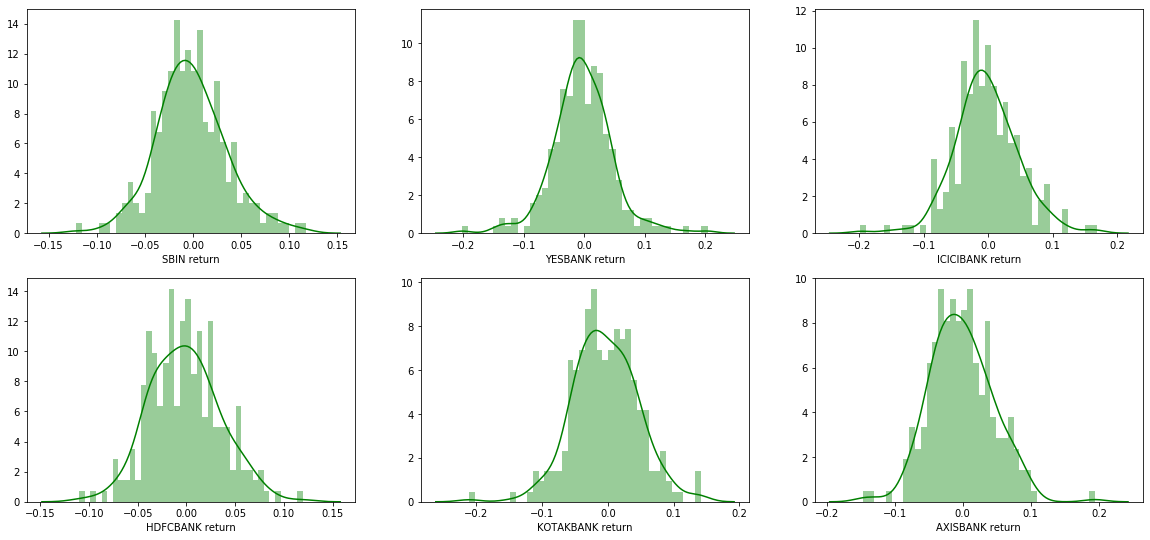

In [271]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(20,14))

for n,bank in enumerate(tickers1):
    ax=fig.add_subplot(3,3,n+1)
    sns.distplot(returns1.loc[date(2008,1,1):date(2008,12,31)][bank + ' return'],color='green',bins=40)

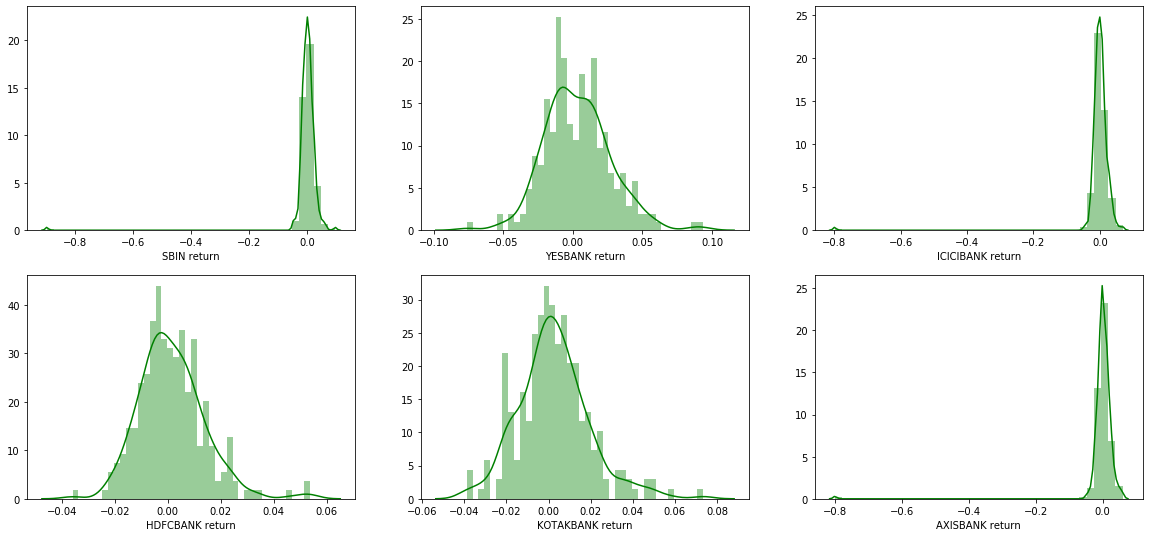

In [272]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(20,14))

for n,bank in enumerate(tickers1):
    ax=fig.add_subplot(3,3,n+1)
    sns.distplot(returns1.loc[date(2014,1,1):date(2014,12,31)][bank + ' return'],color='green',bins=40)

### American Banks - 2008 and 2014

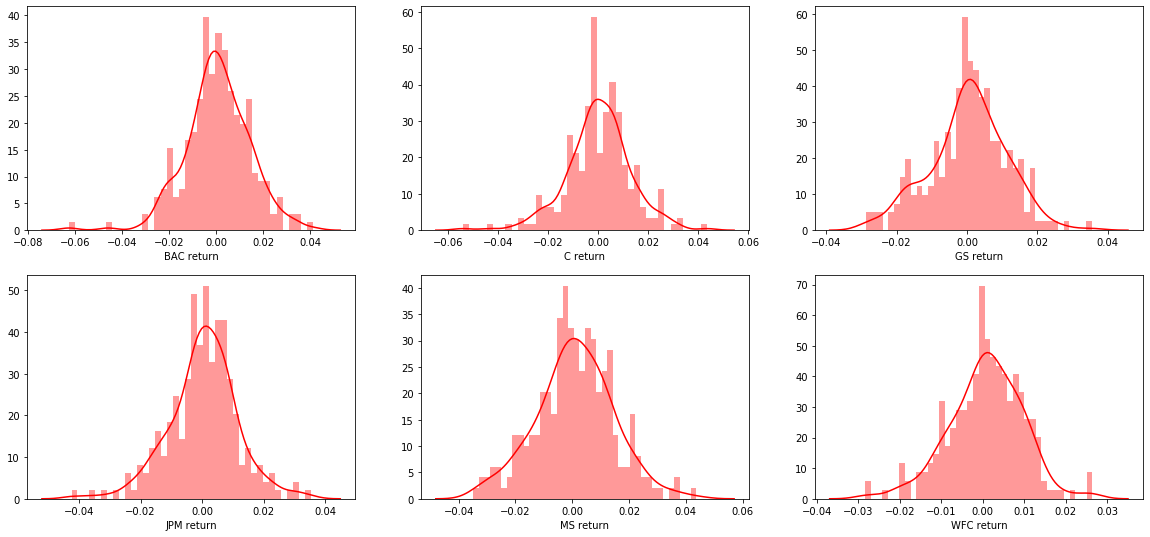

In [274]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(20,14))

for n,bank in enumerate(tickers2):
    ax=fig.add_subplot(3,3,n+1)
    sns.distplot(returns2.loc[date(2014,1,1):date(2014,12,31)][bank + ' return'],color='red',bins=40)

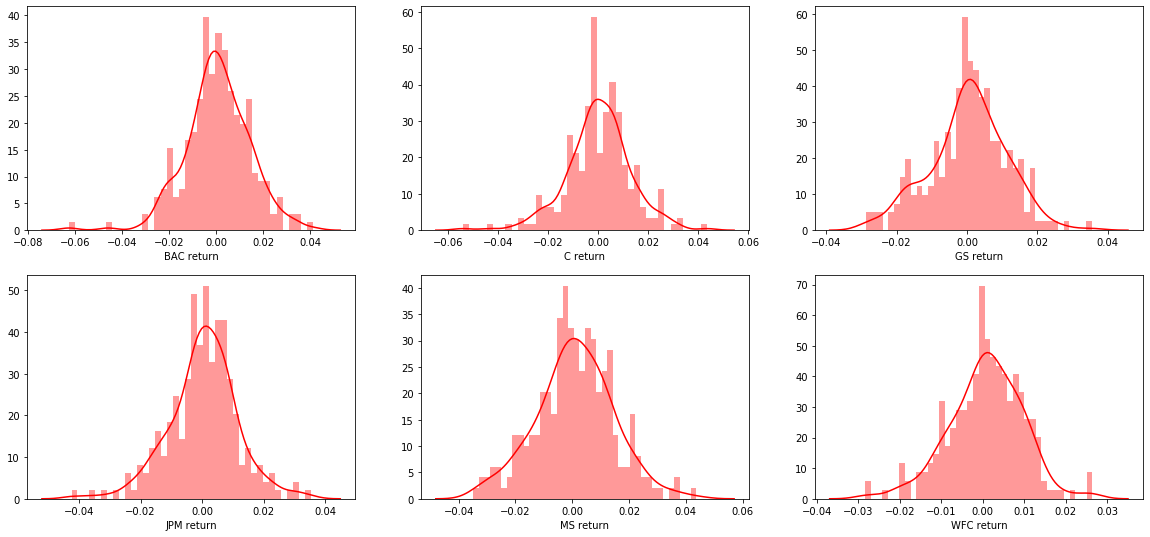

In [273]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(20,14))

for n,bank in enumerate(tickers2):
    ax=fig.add_subplot(3,3,n+1)
    sns.distplot(returns2.loc[date(2014,1,1):date(2014,12,31)][bank + ' return'],color='red',bins=40)

## Line plots

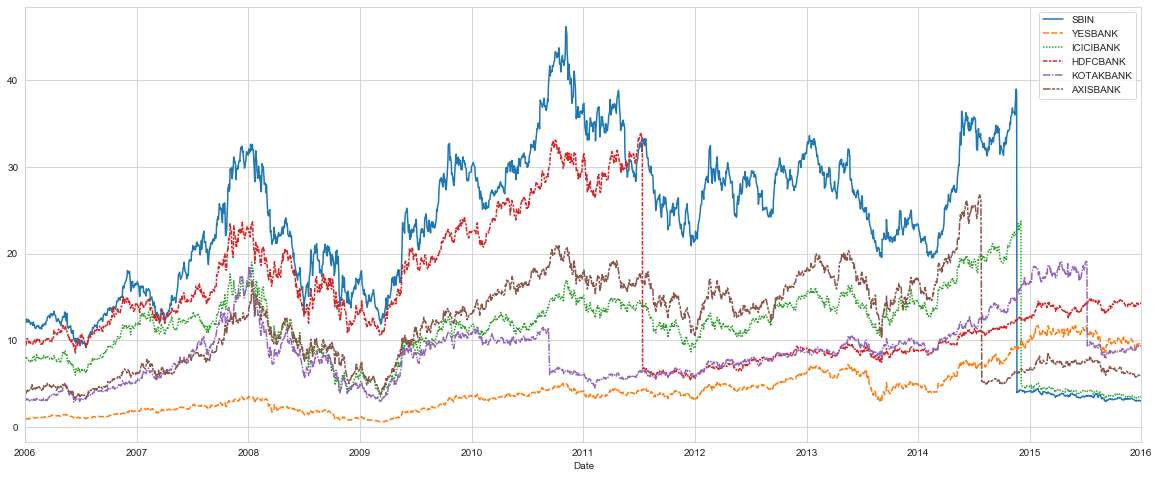

In [290]:
fig = plt.figure(figsize=(20,8))
ax0 = fig.add_subplot(1,1,1)
ax0.set_xlim([date(2006,1,1),date(2016,1,1)])
df = bank_stocks1.xs('Close',level=1,axis=1)
sns.lineplot(data=df)

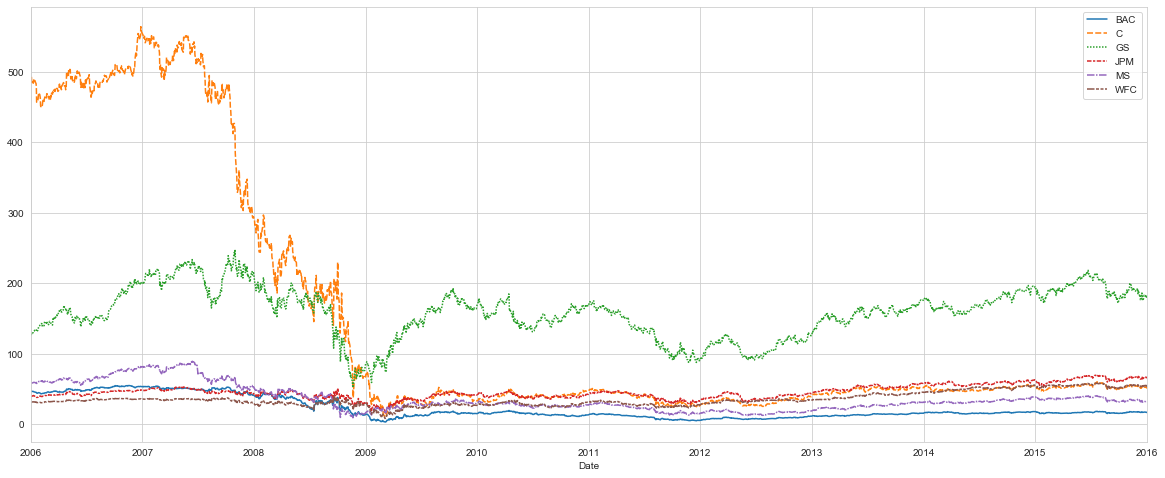

In [291]:
fig = plt.figure(figsize=(20,8))
ax0 = fig.add_subplot(1,1,1)
ax0.set_xlim([date(2006,1,1),date(2016,1,1)])
df = bank_stocks2.xs('Close',level=1,axis=1)
sns.lineplot(data=df)

## Moving Averages

### Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008-09

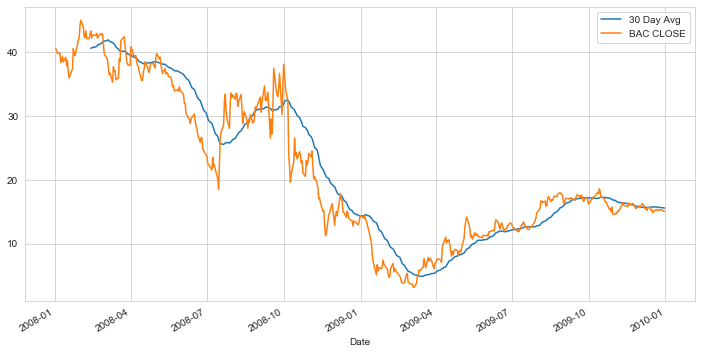

In [301]:
plt.figure(figsize=(12,6))
BAC['Close'].loc[date(2008,1,1):date(2010,1,1)].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc[date(2008,1,1):date(2010,1,1)].plot(label='BAC CLOSE')
plt.legend()

### Plotting the rolling 30 day average against the Close Price for State Bank of India's stock for the year 2008

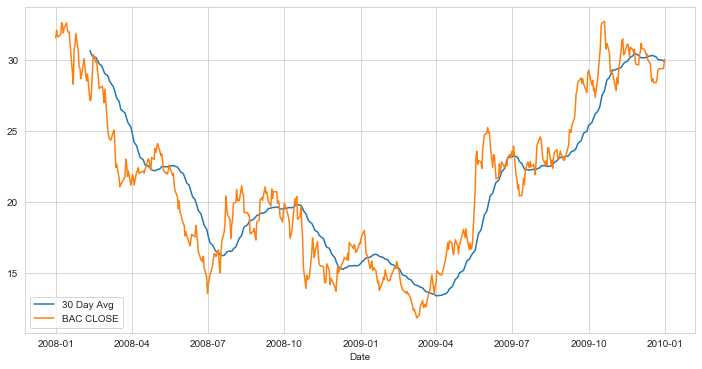

In [302]:
plt.figure(figsize=(12,6))
SBIN['Close'].loc[date(2008,1,1):date(2010,1,1)].rolling(window=30).mean().plot(label='30 Day Avg')
SBIN['Close'].loc[date(2008,1,1):date(2010,1,1)].plot(label='BAC CLOSE')
plt.legend()

## Heatmap of the correlation between the stocks Close Price

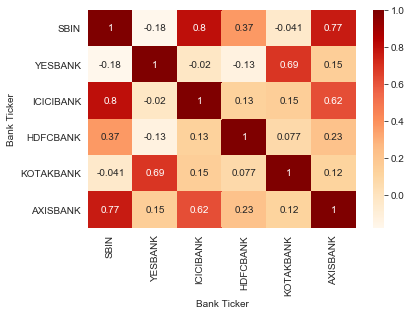

In [298]:
sns.heatmap(bank_stocks1.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='OrRd')

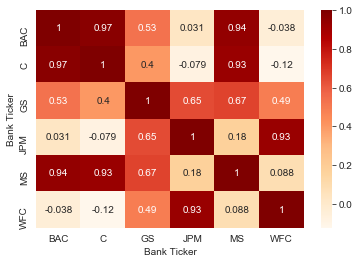

In [299]:
sns.heatmap(bank_stocks2.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True,cmap='OrRd')

## Interactive technical plots

Candle Plot of SBI in 2015

In [307]:
SBIN[['Open', 'High', 'Low', 'Close']].loc[date(2015,1,1):date(2016,1,1)].iplot(kind='candle')

Simple Moving Averages plot of ICICI Bank for the year 2015

In [309]:
ICICIBANK['Close'].loc[date(2015,1,1):date(2016,1,1)].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

Bollinger Band Plot for Axis Bank for the year 2015

In [310]:
AXISBANK['Close'].loc[date(2015,1,1):date(2016,1,1)].ta_plot(study='boll')